## 💸 FinSight – Intelligent Personal Expense Predictor

## Introduction :
In today’s fast-paced world, managing personal finances has become a crucial skill for individuals across all income levels. With expenses spread across rent, groceries, loans, and lifestyle costs, it’s often challenging to understand and forecast monthly spending patterns.

This project aims to bridge that gap by developing a machine learning-based expense prediction system that can provide users with quick, accurate, and personalized monthly expense estimates. The model leverages Ridge Regression to ensure stable predictions even when features are correlated, making it highly suitable for real-world financial datasets.

To make the solution more practical, we have also deployed the model using Streamlit, enabling real-time predictions through an interactive web interface.

## Problem Statement
Given key financial details such as annual income, monthly EMI, grocery expenses, food expenditure, and rent, predict the total monthly personal expenses for an individual.

The solution should:

Accurately estimate monthly expenses based on limited inputs.

Be simple enough for non-technical users to interact with.

Be scalable for integration into larger financial advisory systems or budgeting tools.

Provide predictions in real-time through a web interface.

By solving this problem, we can empower individuals to:

Make informed budgeting decisions.

Identify potential overspending areas.

Plan savings more effectively.

In [120]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
# Show all columns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
import joblib

In [2]:
# loading dataset
df = pd.read_csv('personal_finance_expense_data.csv')

In [3]:
#checking first few rows
df.head()

,User_ID,Age,Gender,Job_Type,Annual_Income,Marital_Status,Number_of_Dependents,Rent,EMI,Grocery,Food_Outside,Travel,Entertainment,Healthcare,Subscriptions,Education,Savings,Financial_Goal,Target_Monthly_Expense
0,1,56,Female,Salaried,636583.0,Single,3,19331.0,5812,4828.0,1806,1311,1329,1079,661,3023,16994.0,NaN,39180
1,2,46,Other,Self-Employed,229254.0,Single,0,4187.0,11075,8241.0,1288,2354,1388,0,863,2199,13979.0,Buy House,31128
2,3,32,Female,Salaried,692431.0,Married,2,9531.0,10712,4679.0,2583,2603,1463,1438,597,3402,14410.0,Education,37008
3,4,60,Male,Student,578161.0,Married,4,8478.0,6601,3025.0,1459,2284,888,0,542,0,14737.0,Save for Trip,22338
4,5,25,Female,Unemployed,826928.0,Single,3,4814.0,12549,6144.0,1737,874,802,1703,1184,3298,12616.0,Buy House,33105


In [4]:
# checking last few rows 
df.tail()

,User_ID,Age,Gender,Job_Type,Annual_Income,Marital_Status,Number_of_Dependents,Rent,EMI,Grocery,Food_Outside,Travel,Entertainment,Healthcare,Subscriptions,Education,Savings,Financial_Goal,Target_Monthly_Expense
4995,4996,33,Male,Freelancer,298090.0,Single,3,8247.0,8941,NaN,2111,2779,844,2059,573,161,6150.0,NaN,32106
4996,4997,22,Male,Salaried,646107.0,Married,0,16442.0,12824,3723.0,3069,2634,2233,522,1221,3982,7471.0,Save for Trip,46650
4997,4998,38,Other,Freelancer,445063.0,Single,0,7636.0,11995,6738.0,1108,4195,0,540,254,3185,10574.0,Education,35213
4998,4999,27,Male,Salaried,1028542.0,Single,3,11533.0,9565,4542.0,1722,2392,1030,1735,510,2145,16546.0,Education,35174
4999,5000,36,Male,Salaried,887920.0,Single,2,8148.0,9034,4925.0,1850,521,701,718,1055,1290,8837.0,Buy House,28242


In [5]:
# data inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 5000 non-null   int64  
 1   Age                     5000 non-null   int64  
 2   Gender                  5000 non-null   object 
 3   Job_Type                4850 non-null   object 
 4   Annual_Income           4850 non-null   float64
 5   Marital_Status          5000 non-null   object 
 6   Number_of_Dependents    5000 non-null   int64  
 7   Rent                    4850 non-null   float64
 8   EMI                     5000 non-null   int64  
 9   Grocery                 4850 non-null   float64
 10  Food_Outside            5000 non-null   int64  
 11  Travel                  5000 non-null   int64  
 12  Entertainment           5000 non-null   int64  
 13  Healthcare              5000 non-null   int64  
 14  Subscriptions           5000 non-null   

In [6]:
# statistical information
df.describe()

,User_ID,Age,Annual_Income,Number_of_Dependents,Rent,EMI,Grocery,Food_Outside,Travel,Entertainment,Healthcare,Subscriptions,Education,Savings,Target_Monthly_Expense
count,5000.000000,5000.00000,4.850000e+03,5000.000000,4850.000000,5000.000000,4850.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4850.000000,5000.000000
mean,2500.500000,41.16820,6.017619e+05,2.029600,12045.410103,8015.783800,5012.758144,2007.667800,1552.053000,1008.699200,1508.974400,795.389400,2050.392000,10100.827010,33786.415400
std,1443.520003,13.53105,2.015899e+05,1.411496,4962.166798,3883.084506,1505.589611,991.128771,946.608788,650.163576,782.508245,298.435295,1396.875111,4823.145639,6994.464963
min,1.000000,18.00000,-1.270400e+05,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8899.000000
25%,1250.750000,29.00000,4.679355e+05,1.000000,8664.500000,5340.000000,4011.000000,1319.750000,847.750000,518.000000,966.000000,595.000000,972.500000,6702.250000,29125.250000
50%,2500.500000,41.00000,6.023385e+05,2.000000,11972.500000,7930.000000,5014.000000,1990.500000,1529.000000,986.000000,1491.500000,787.000000,1975.500000,10071.000000,33906.500000
75%,3750.250000,53.00000,7.351990e+05,3.000000,15376.250000,10604.500000,6015.000000,2676.000000,2200.000000,1465.250000,2028.000000,998.000000,3011.250000,13379.250000,38526.500000
max,5000.000000,64.00000,1.285782e+06,4.000000,29713.000000,22561.000000,11149.000000,5407.000000,4975.000000,3384.000000,4427.000000,1791.000000,7790.000000,26513.000000,56784.000000


In [7]:
# check for missing values
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Job_Type                   150
Annual_Income              150
Marital_Status               0
Number_of_Dependents         0
Rent                       150
EMI                          0
Grocery                    150
Food_Outside                 0
Travel                       0
Entertainment                0
Healthcare                   0
Subscriptions                0
Education                    0
Savings                    150
Financial_Goal            1022
Target_Monthly_Expense       0
dtype: int64

In [8]:
# check for duplicates
df.duplicated().sum()

0

## Univariate Analysis : 1.	User_ID
	2.	Age
	3.	Annual_Income
	4.	Number_of_Dependents
	5.	Rent
	6.	EMI
	7.	Grocery
	8.	Food_Outside
	9.	Travel
	10.	Entertainment
	11.	Healthcare
	12.	Subscriptions
	13.	Education
	14.	Savings
	15.	Target_Monthly_Expense  ✅ (Target variable)

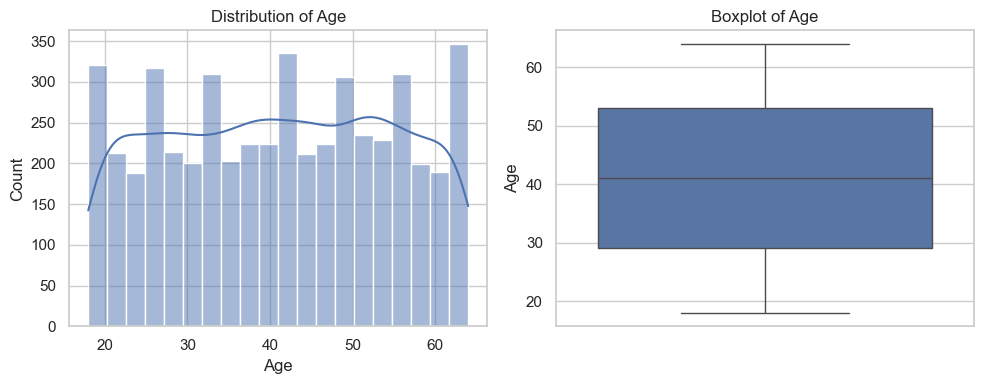

In [9]:
# Age
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

plt.tight_layout()
plt.show()

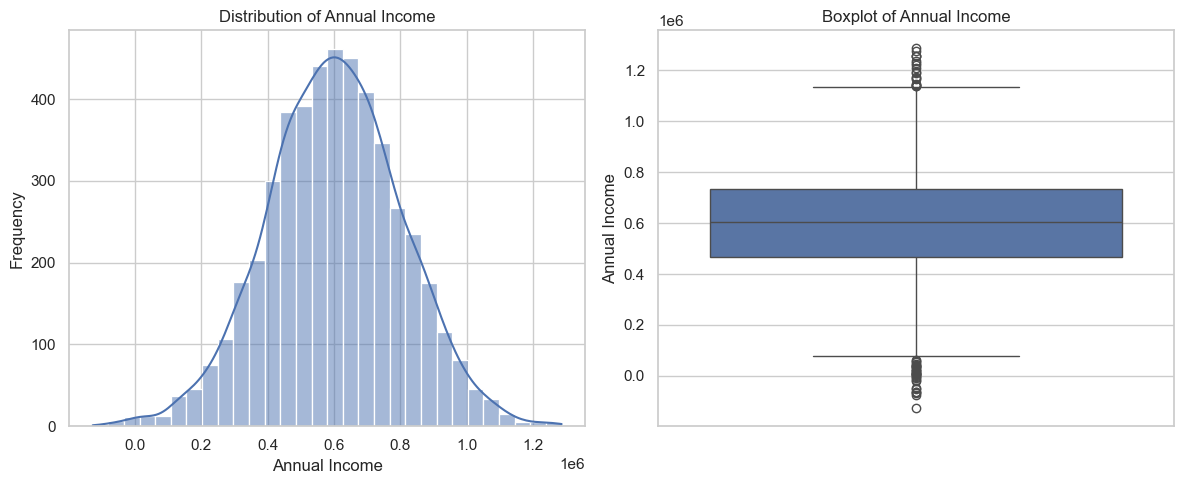

In [10]:
# Annual Income
plt.figure(figsize=(12, 5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['Annual_Income'], kde=True, bins=30)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Annual_Income'])
plt.title('Boxplot of Annual Income')
plt.ylabel('Annual Income')

plt.tight_layout()
plt.show()

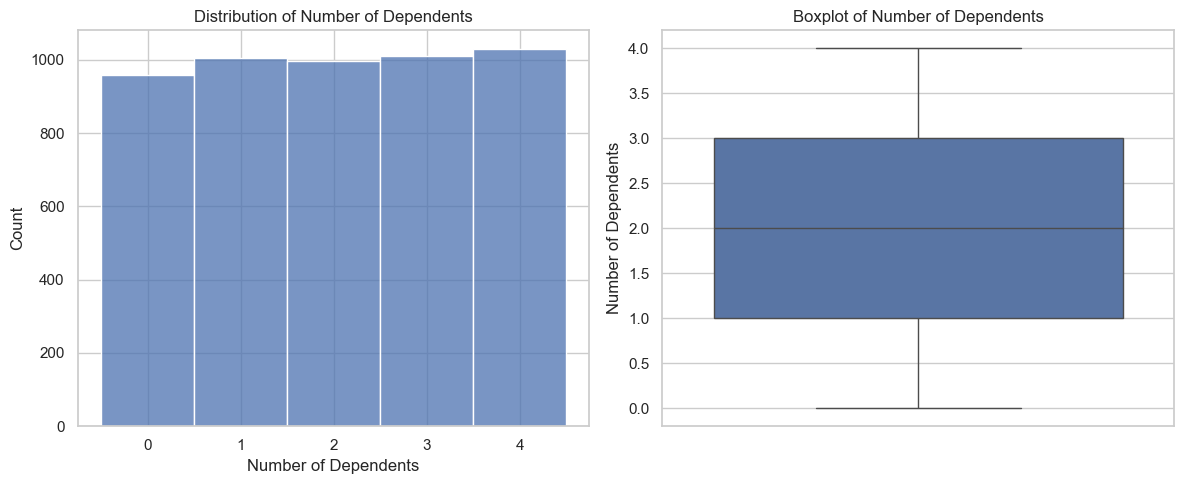

In [11]:
# Number of Dependents
plt.figure(figsize=(12, 5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['Number_of_Dependents'], kde=False, bins=range(int(df['Number_of_Dependents'].min()), int(df['Number_of_Dependents'].max()) + 2), discrete=True)
plt.title('Distribution of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Number_of_Dependents'])
plt.title('Boxplot of Number of Dependents')
plt.ylabel('Number of Dependents')

plt.tight_layout()
plt.show()

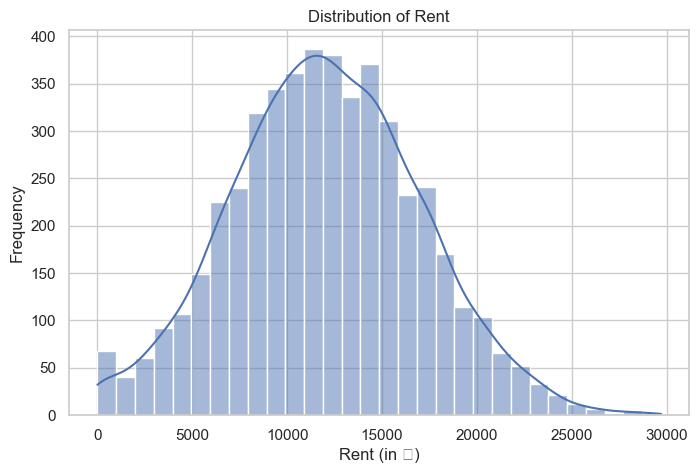

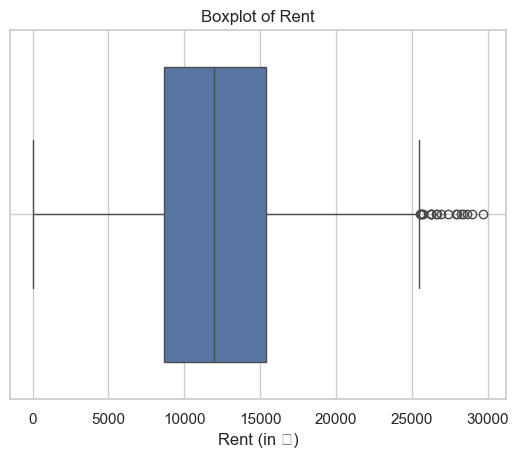

In [13]:
# Rent
plt.figure(figsize=(8,5))
sns.histplot(df['Rent'], kde=True, bins=30)
plt.title('Distribution of Rent')
plt.xlabel('Rent (in ₹)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

sns.boxplot(x=df['Rent'])
plt.title('Boxplot of Rent')
plt.xlabel('Rent (in ₹)')
plt.grid(True)
plt.show()

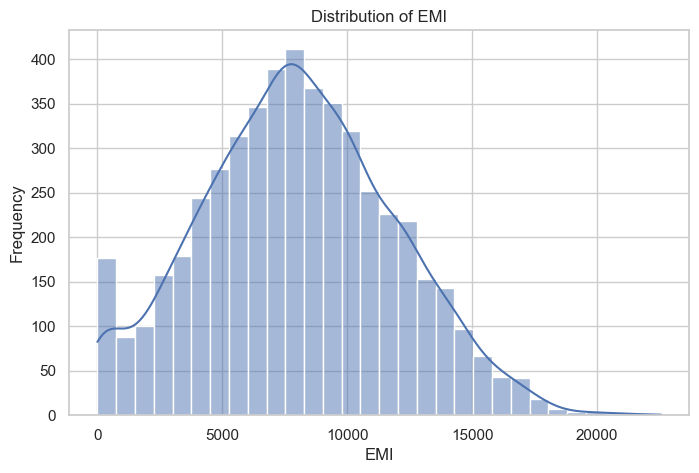

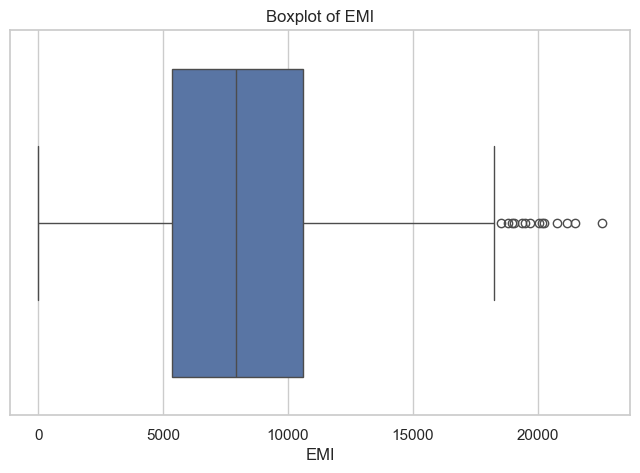

In [15]:
# EMI
plt.figure(figsize=(8,5))
sns.histplot(df['EMI'], kde=True, bins=30)
plt.title('Distribution of EMI')
plt.xlabel('EMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['EMI'])
plt.title('Boxplot of EMI')
plt.show()

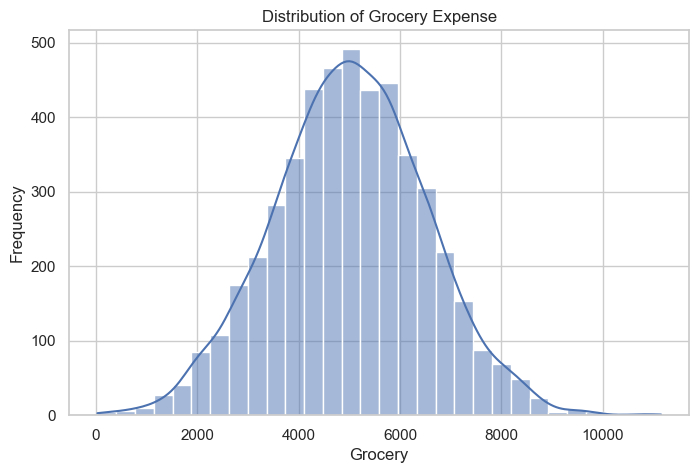

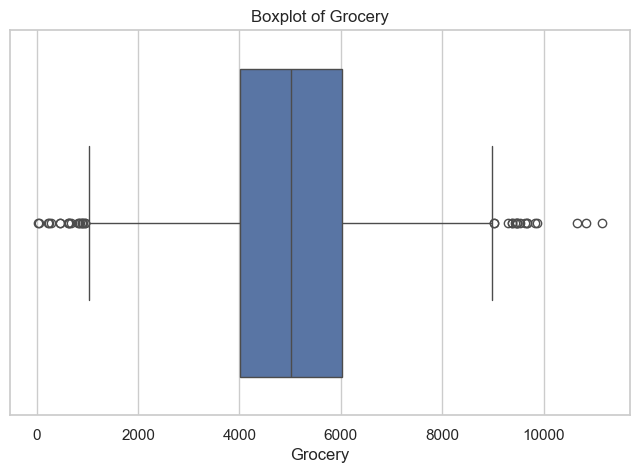

In [17]:
# Grocery
plt.figure(figsize=(8,5))
sns.histplot(df['Grocery'], kde=True, bins=30)
plt.title('Distribution of Grocery Expense')
plt.xlabel('Grocery')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Grocery'])
plt.title('Boxplot of Grocery')
plt.show()

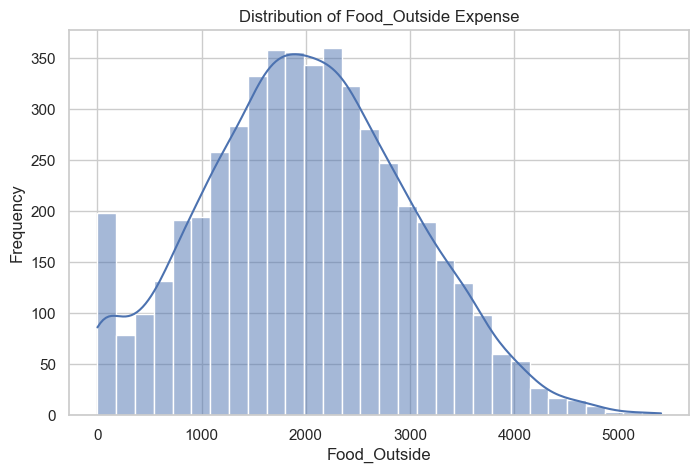

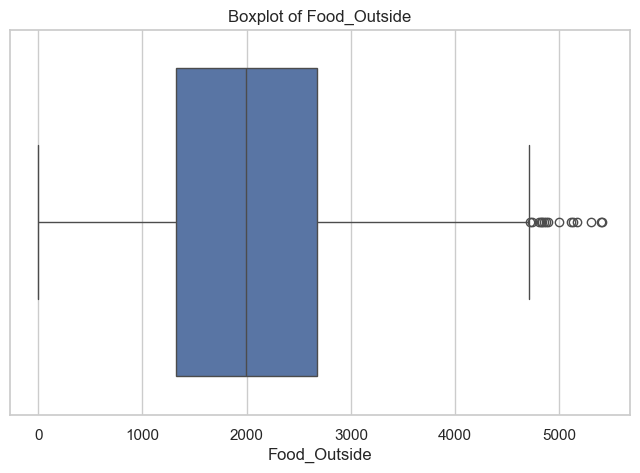

In [20]:
# Food Outside
plt.figure(figsize=(8,5))
sns.histplot(df['Food_Outside'], kde=True, bins=30)
plt.title('Distribution of Food_Outside Expense')
plt.xlabel('Food_Outside')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Food_Outside'])
plt.title('Boxplot of Food_Outside')
plt.show()

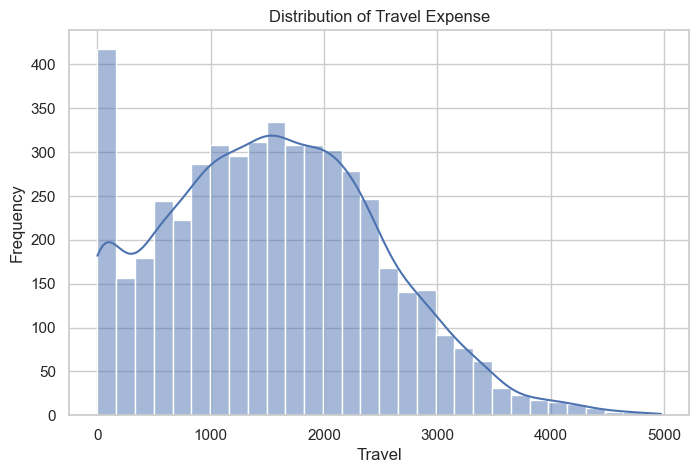

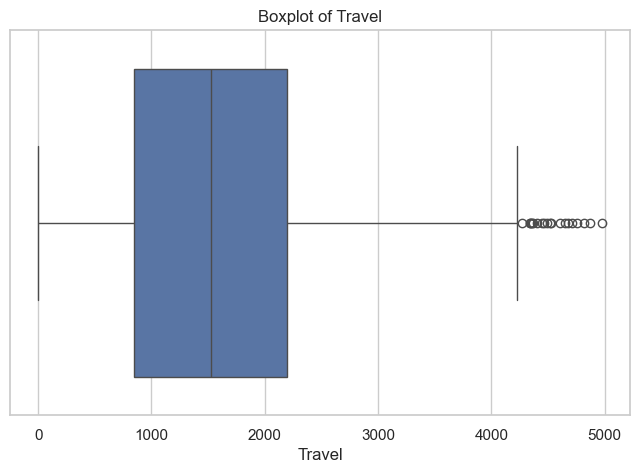

In [22]:
# Travel
plt.figure(figsize=(8,5))
sns.histplot(df['Travel'], kde=True, bins=30)
plt.title('Distribution of Travel Expense')
plt.xlabel('Travel')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Travel'])
plt.title('Boxplot of Travel')
plt.show()

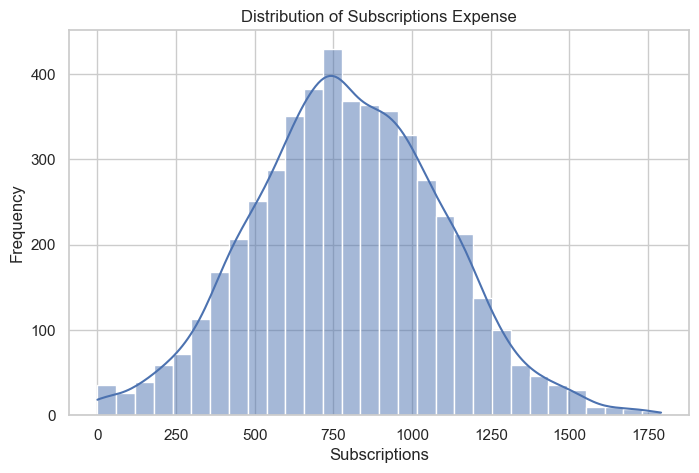

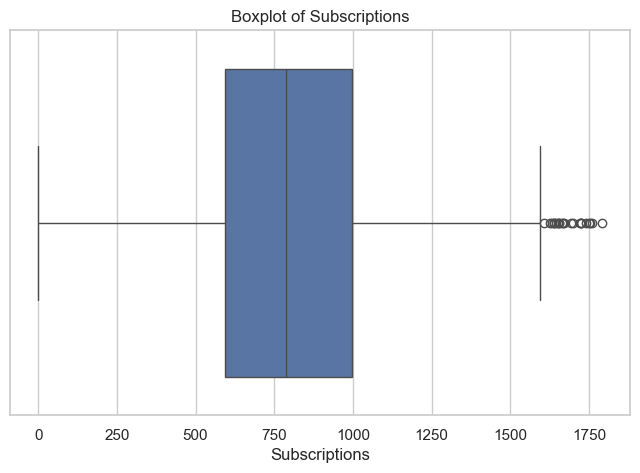

In [25]:
# Subscriptions
plt.figure(figsize=(8,5))
sns.histplot(df['Subscriptions'], kde=True, bins=30)
plt.title('Distribution of Subscriptions Expense')
plt.xlabel('Subscriptions')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Subscriptions'])
plt.title('Boxplot of Subscriptions')
plt.show()

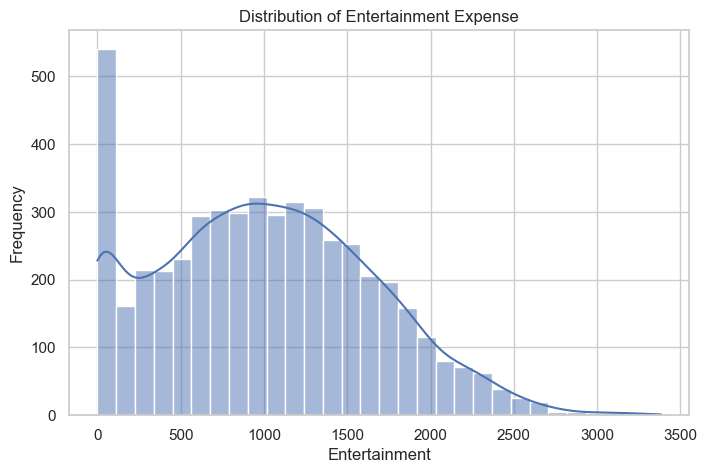

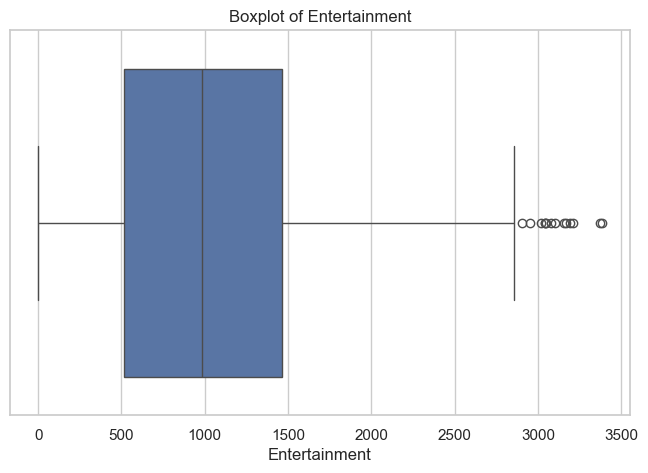

In [27]:
# Entertainment
plt.figure(figsize=(8,5))
sns.histplot(df['Entertainment'], kde=True, bins=30)
plt.title('Distribution of Entertainment Expense')
plt.xlabel('Entertainment')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Entertainment'])
plt.title('Boxplot of Entertainment')
plt.show()

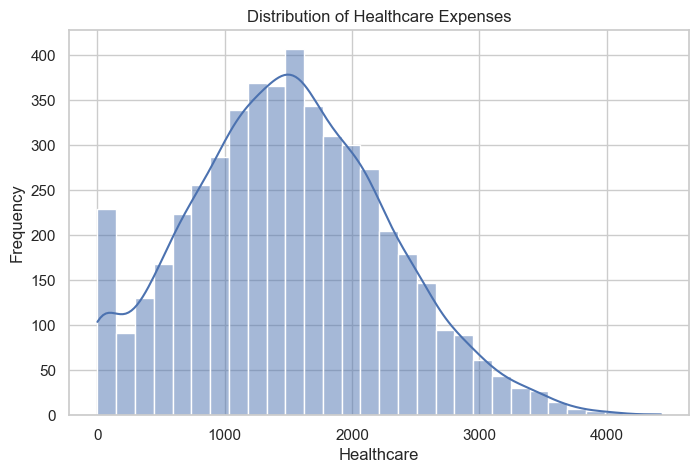

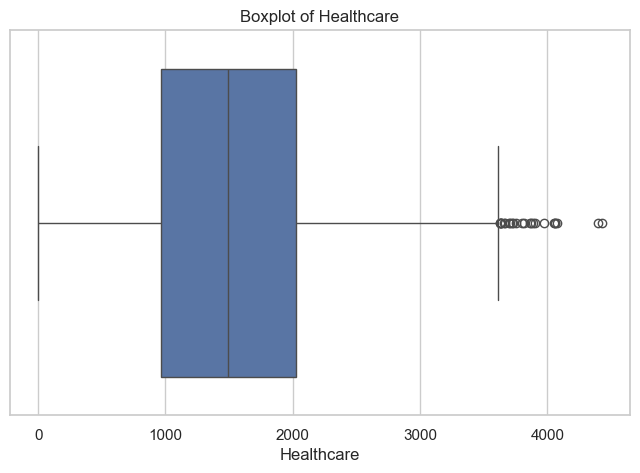

In [29]:
# Healthcare
plt.figure(figsize=(8,5))
sns.histplot(df['Healthcare'], kde=True, bins=30)
plt.title('Distribution of Healthcare Expenses')
plt.xlabel('Healthcare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Healthcare'])
plt.title('Boxplot of Healthcare')
plt.show()

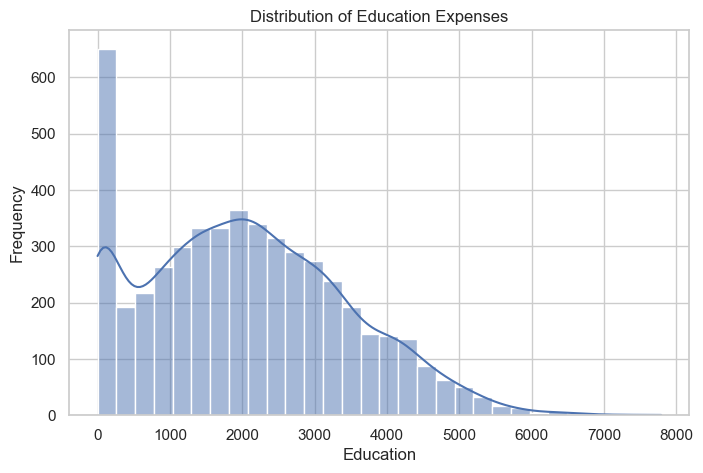

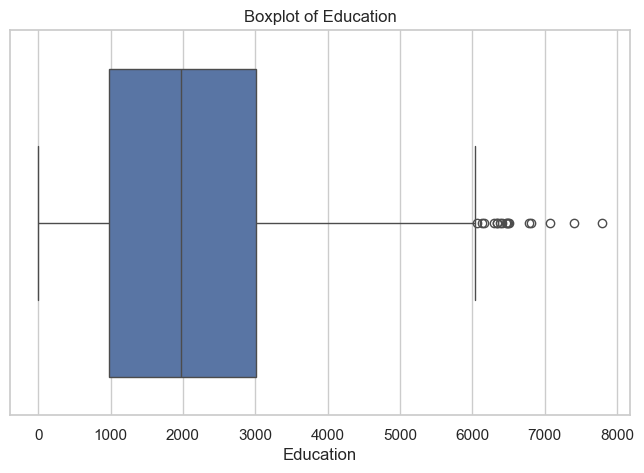

In [32]:
# Education
plt.figure(figsize=(8,5))
sns.histplot(df['Education'], kde=True, bins=30)
plt.title('Distribution of Education Expenses')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Education'])
plt.title('Boxplot of Education')
plt.show()

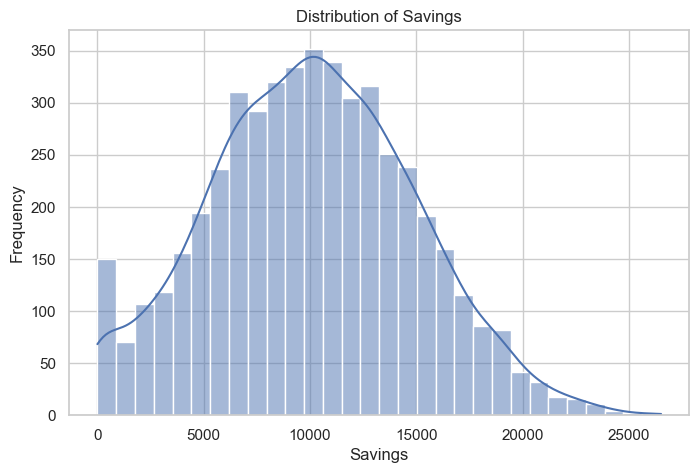

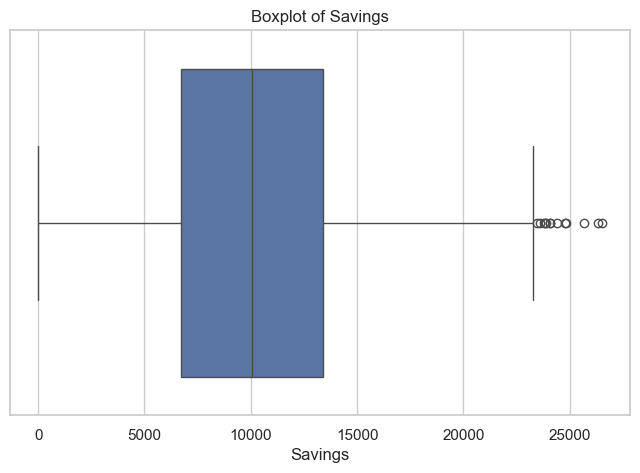

In [34]:
# Savings
plt.figure(figsize=(8,5))
sns.histplot(df['Savings'], kde=True, bins=30)
plt.title('Distribution of Savings')
plt.xlabel('Savings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Savings'])
plt.title('Boxplot of Savings')
plt.show()

In [35]:
# Handling Outliers

# List of numerical columns (excluding target if needed)
numerical_cols = [
    'Age', 'Annual_Income', 'Number_of_Dependents', 'Rent', 'EMI',
    'Grocery', 'Food_Outside', 'Travel', 'Entertainment', 'Healthcare',
    'Subscriptions', 'Education', 'Savings'
]

In [36]:
# Function to handle outliers using IQR
def handle_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)  # Cap outliers to bounds
    return df

In [37]:
# Apply outlier handling to all numerical columns
for col in numerical_cols:
    df = handle_outliers_iqr(df, col)

In [39]:
# Cateogerical Columns

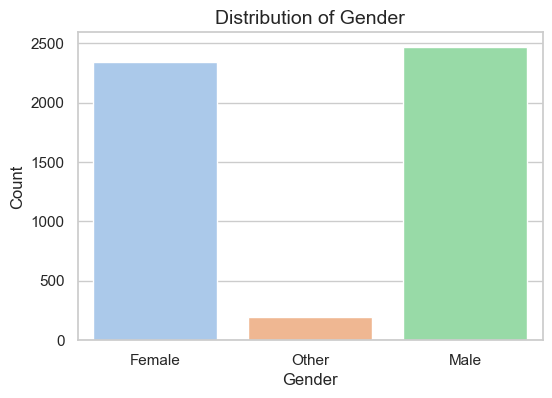

In [43]:
# Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Distribution of Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

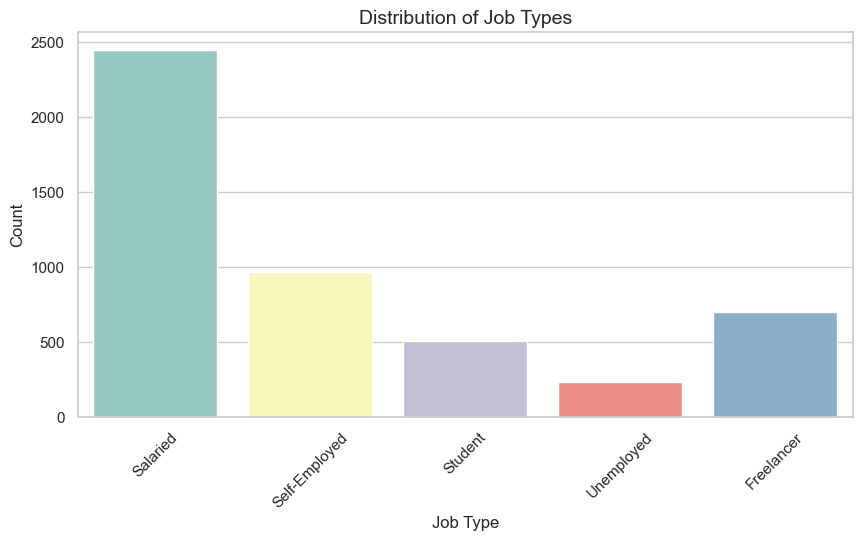

In [42]:
# Job type
plt.figure(figsize=(10, 5))
sns.countplot(x='Job_Type', data=df, palette='Set3')
plt.title('Distribution of Job Types', fontsize=14)
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

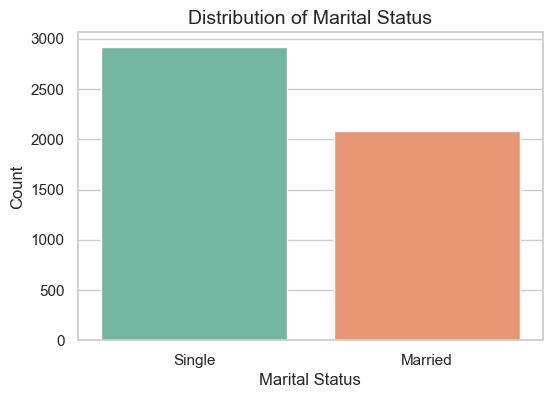

In [44]:
# marital Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Marital_Status', data=df, palette='Set2')
plt.title('Distribution of Marital Status', fontsize=14)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

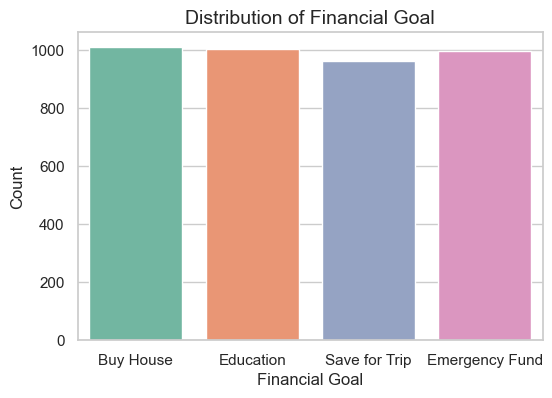

In [48]:
# Financial Goal
plt.figure(figsize=(6, 4))
sns.countplot(x='Financial_Goal', data=df, palette='Set2')
plt.title('Distribution of Financial Goal', fontsize=14)
plt.xlabel('Financial Goal')
plt.ylabel('Count')
plt.show()

In [46]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Job_Type', 'Annual_Income',
       'Marital_Status', 'Number_of_Dependents', 'Rent', 'EMI', 'Grocery',
       'Food_Outside', 'Travel', 'Entertainment', 'Healthcare',
       'Subscriptions', 'Education', 'Savings', 'Financial_Goal',
       'Target_Monthly_Expense'],
      dtype='object')

## Bivariate Analysis

In [49]:
# Numerical columns

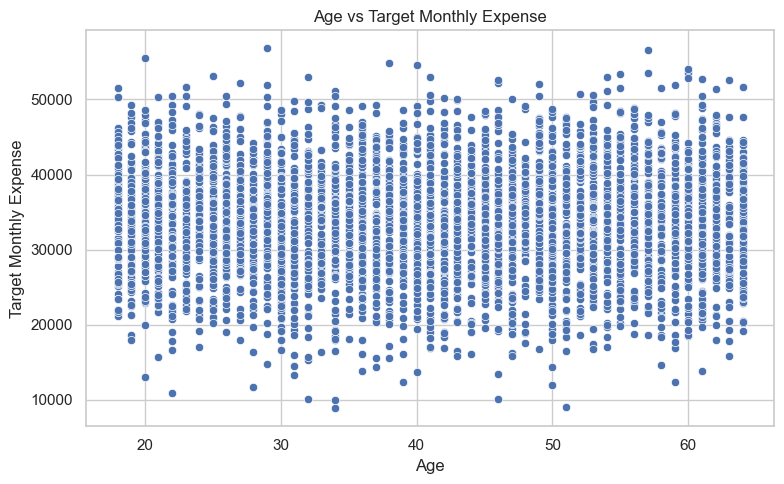

In [51]:
# Age vs Target_Monthly_Expense
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Target_Monthly_Expense')
plt.title("Age vs Target Monthly Expense")
plt.xlabel("Age")
plt.ylabel("Target Monthly Expense")
plt.tight_layout()
plt.show()

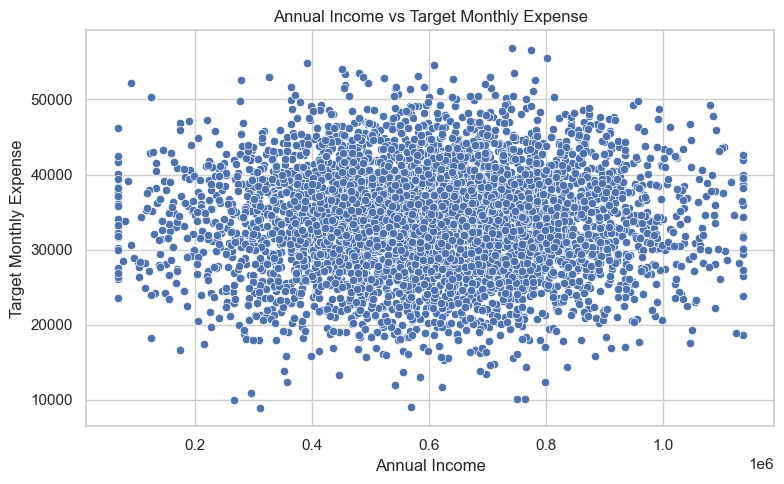

In [52]:
# Annual_Income vs Target_Monthly_Expense
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual_Income', y='Target_Monthly_Expense')
plt.title("Annual Income vs Target Monthly Expense")
plt.xlabel("Annual Income")
plt.ylabel("Target Monthly Expense")
plt.tight_layout()
plt.show()

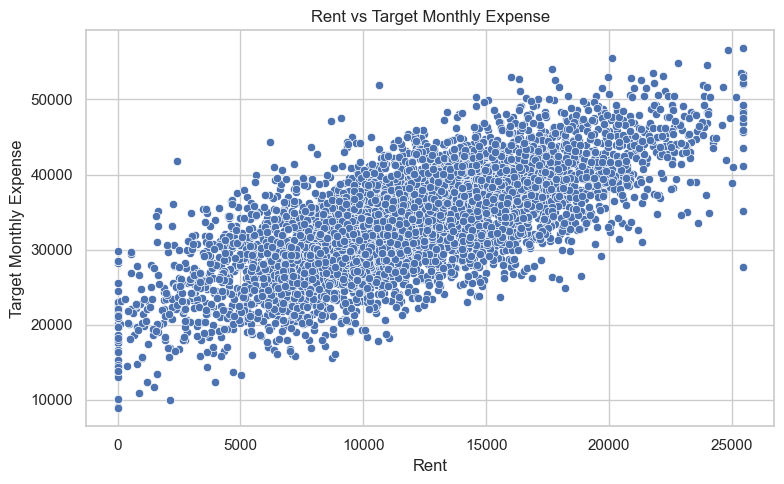

In [53]:
#  Rent vs Target_Monthly_Expense
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Rent', y='Target_Monthly_Expense')
plt.title("Rent vs Target Monthly Expense")
plt.xlabel("Rent")
plt.ylabel("Target Monthly Expense")
plt.tight_layout()
plt.show()

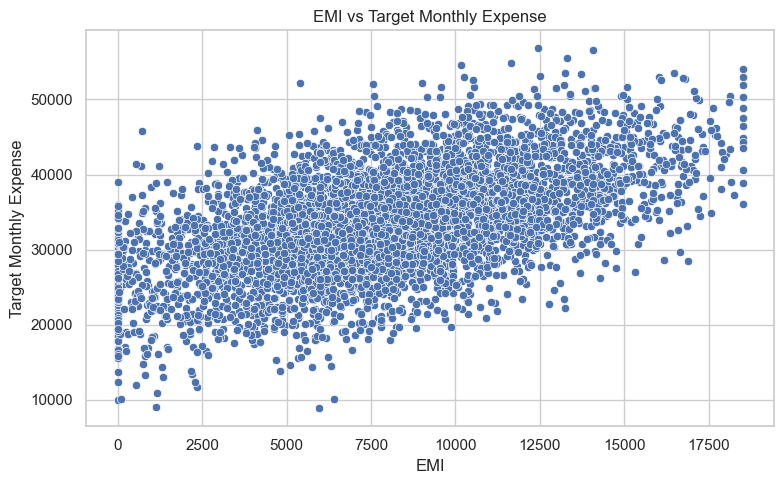

In [54]:
# EMI vs Target_Monthly_Expense
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='EMI', y='Target_Monthly_Expense')
plt.title("EMI vs Target Monthly Expense")
plt.xlabel("EMI")
plt.ylabel("Target Monthly Expense")
plt.tight_layout()
plt.show()

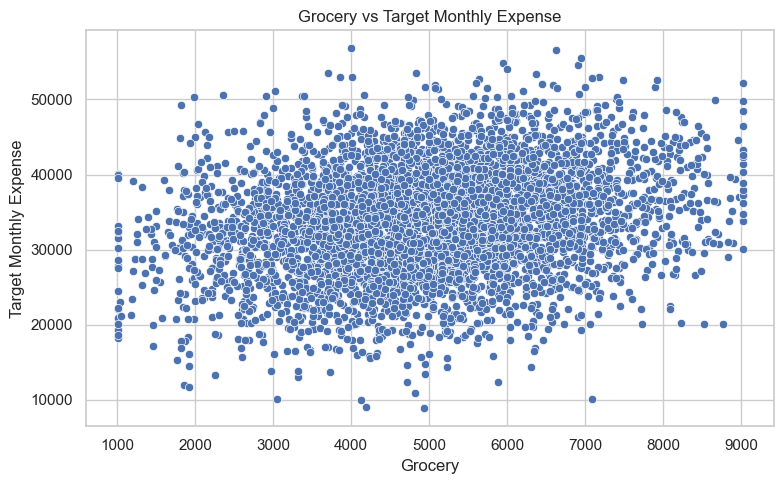

In [55]:
# Grocery vs Target_Monthly_Expense
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Grocery', y='Target_Monthly_Expense')
plt.title("Grocery vs Target Monthly Expense")
plt.xlabel("Grocery")
plt.ylabel("Target Monthly Expense")
plt.tight_layout()
plt.show()

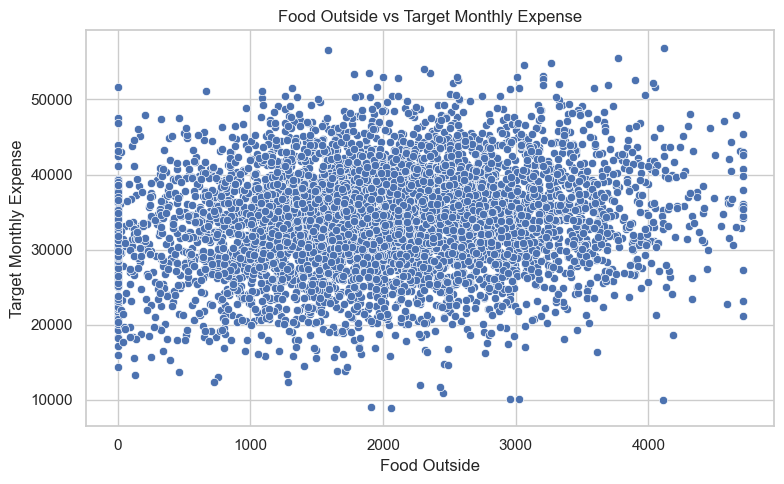

In [56]:
# Food_Outside vs Target_Monthly_Expense
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Food_Outside', y='Target_Monthly_Expense')
plt.title("Food Outside vs Target Monthly Expense")
plt.xlabel("Food Outside")
plt.ylabel("Target Monthly Expense")
plt.tight_layout()
plt.show()

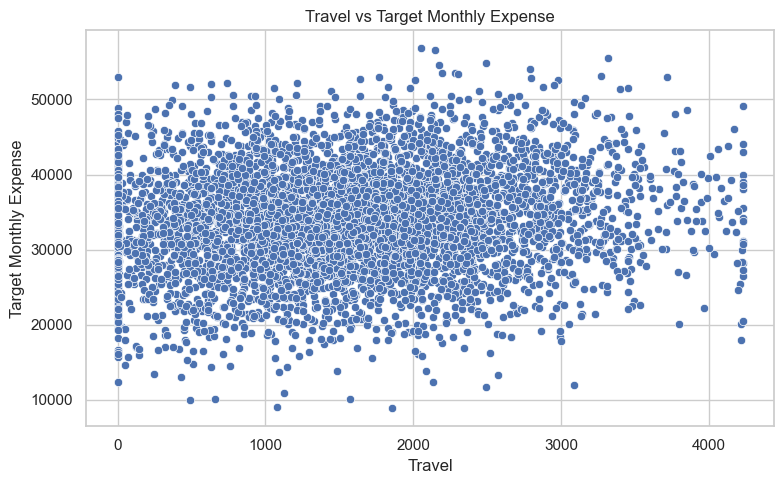

In [57]:
# Travel vs Target_Monthly_Expense
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Travel', y='Target_Monthly_Expense')
plt.title("Travel vs Target Monthly Expense")
plt.xlabel("Travel")
plt.ylabel("Target Monthly Expense")
plt.tight_layout()
plt.show()

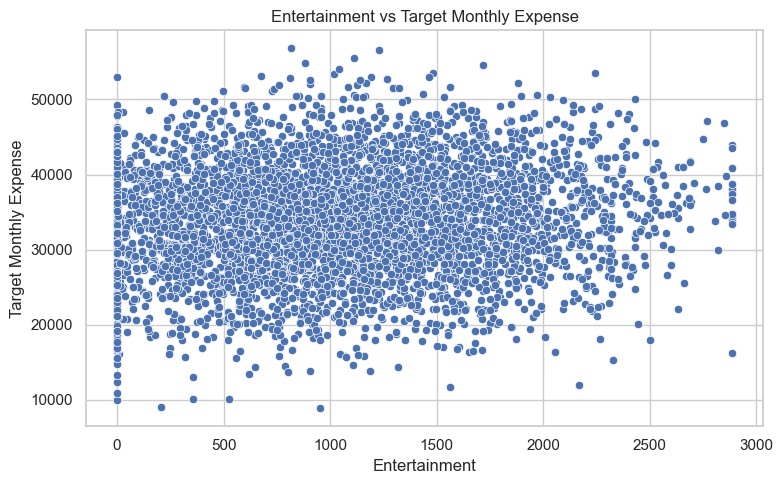

In [58]:
# Entertainment vs Target_Monthly_Expense
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Entertainment', y='Target_Monthly_Expense')
plt.title("Entertainment vs Target Monthly Expense")
plt.xlabel("Entertainment")
plt.ylabel("Target Monthly Expense")
plt.tight_layout()
plt.show()

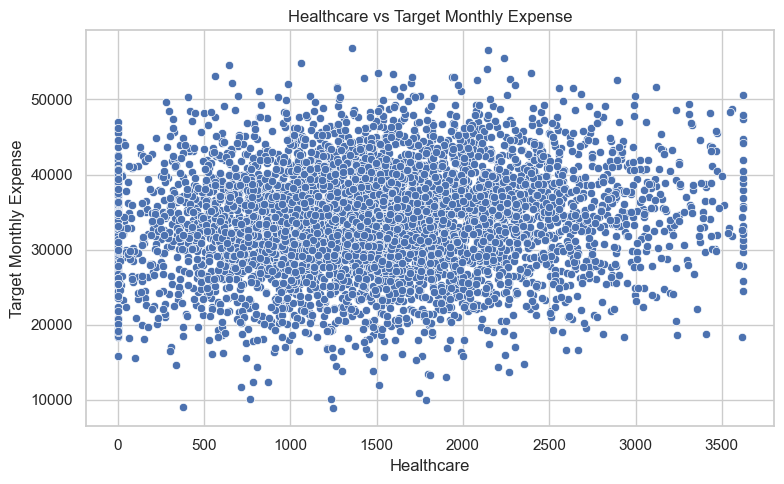

In [59]:
# Healthcare vs Target_Monthly_Expense
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Healthcare', y='Target_Monthly_Expense')
plt.title("Healthcare vs Target Monthly Expense")
plt.xlabel("Healthcare")
plt.ylabel("Target Monthly Expense")
plt.tight_layout()
plt.show()

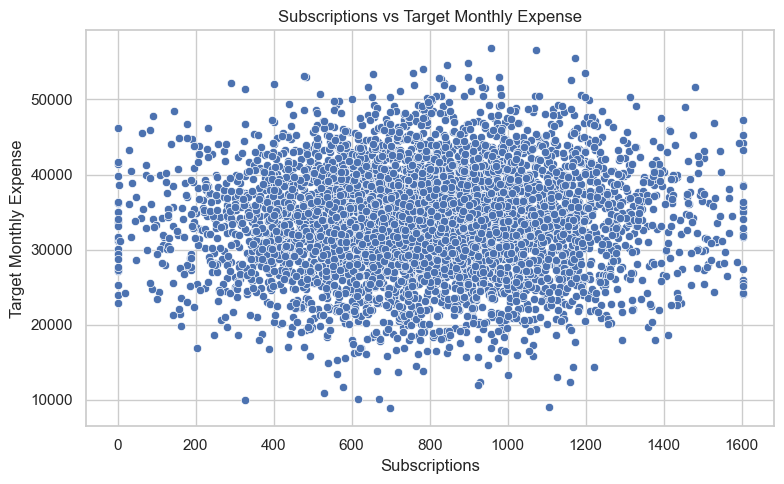

In [60]:
# Subscriptions vs Target_Monthly_Expense
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Subscriptions', y='Target_Monthly_Expense')
plt.title("Subscriptions vs Target Monthly Expense")
plt.xlabel("Subscriptions")
plt.ylabel("Target Monthly Expense")
plt.tight_layout()
plt.show()

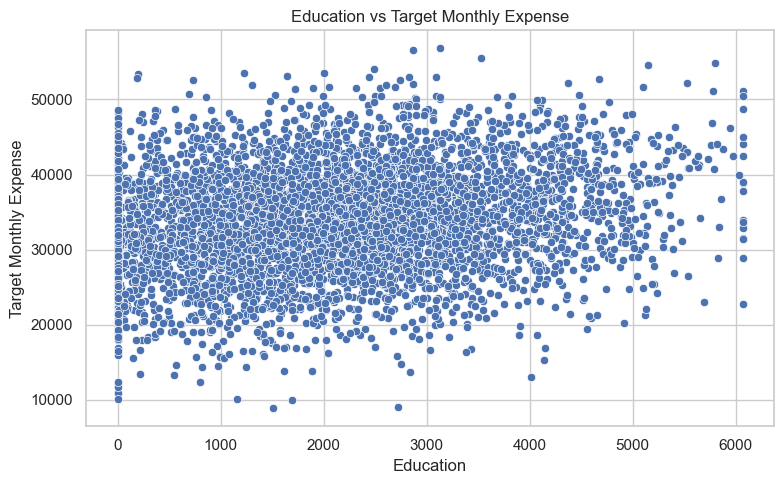

In [61]:
# Education vs Target_Monthly_Expense
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Education', y='Target_Monthly_Expense')
plt.title("Education vs Target Monthly Expense")
plt.xlabel("Education")
plt.ylabel("Target Monthly Expense")
plt.tight_layout()
plt.show()

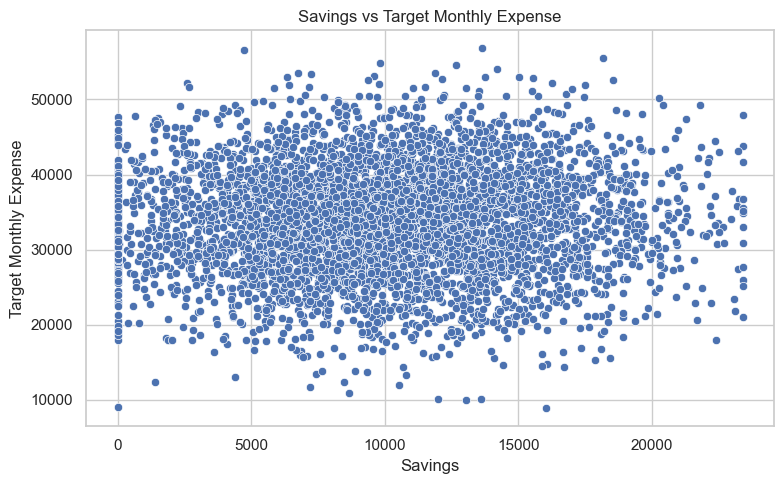

In [62]:
# Savings vs Target_Monthly_Expense
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Savings', y='Target_Monthly_Expense')
plt.title("Savings vs Target Monthly Expense")
plt.xlabel("Savings")
plt.ylabel("Target Monthly Expense")
plt.tight_layout()
plt.show()

In [ ]:
# Binning Annual Income into categories
df['Income_Group'] = pd.cut(df['Annual_Income'],
                            bins=[0, 200000, 500000, 1000000, 2000000],
                            labels=['Low', 'Middle', 'Upper-Middle', 'High'])

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Income_Group', y='Target_Monthly_Expense', order=['Low', 'Middle', 'Upper-Middle', 'High'])
plt.title("Target Monthly Expense by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Target Monthly Expense")
plt.tight_layout()
plt.show()

In [63]:
# Cateogerical columns

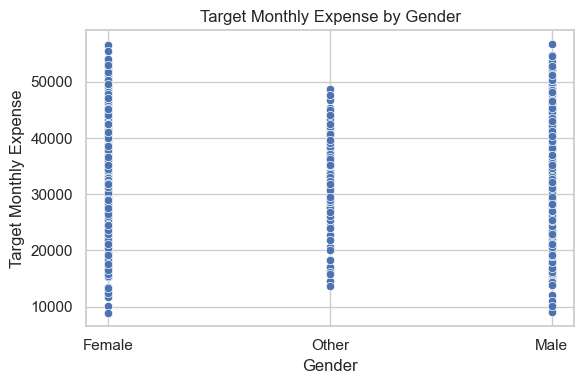

In [67]:
# Gender vs Target_Monthly_Expense
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Gender', y='Target_Monthly_Expense')
plt.title("Target Monthly Expense by Gender")
plt.xlabel("Gender")
plt.ylabel("Target Monthly Expense")
plt.tight_layout()
plt.show()

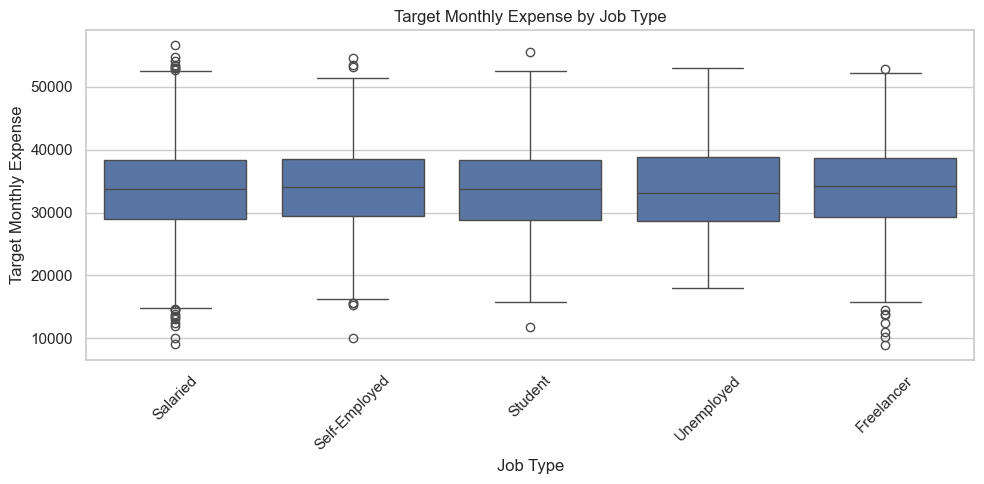

In [65]:
# Job_Type vs Target_Monthly_Expense
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Job_Type', y='Target_Monthly_Expense')
plt.title("Target Monthly Expense by Job Type")
plt.xlabel("Job Type")
plt.ylabel("Target Monthly Expense")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

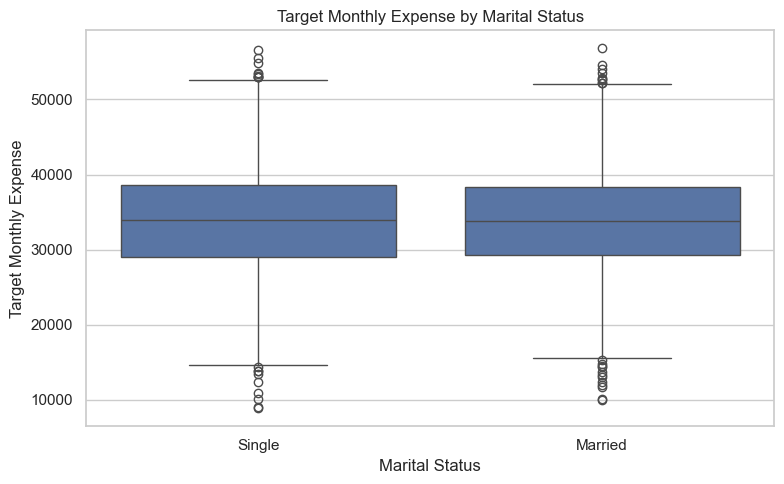

In [66]:
# Marital_Status vs Target_Monthly_Expense
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Marital_Status', y='Target_Monthly_Expense')
plt.title("Target Monthly Expense by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Target Monthly Expense")
plt.tight_layout()
plt.show()

## Coorelation Heatmap

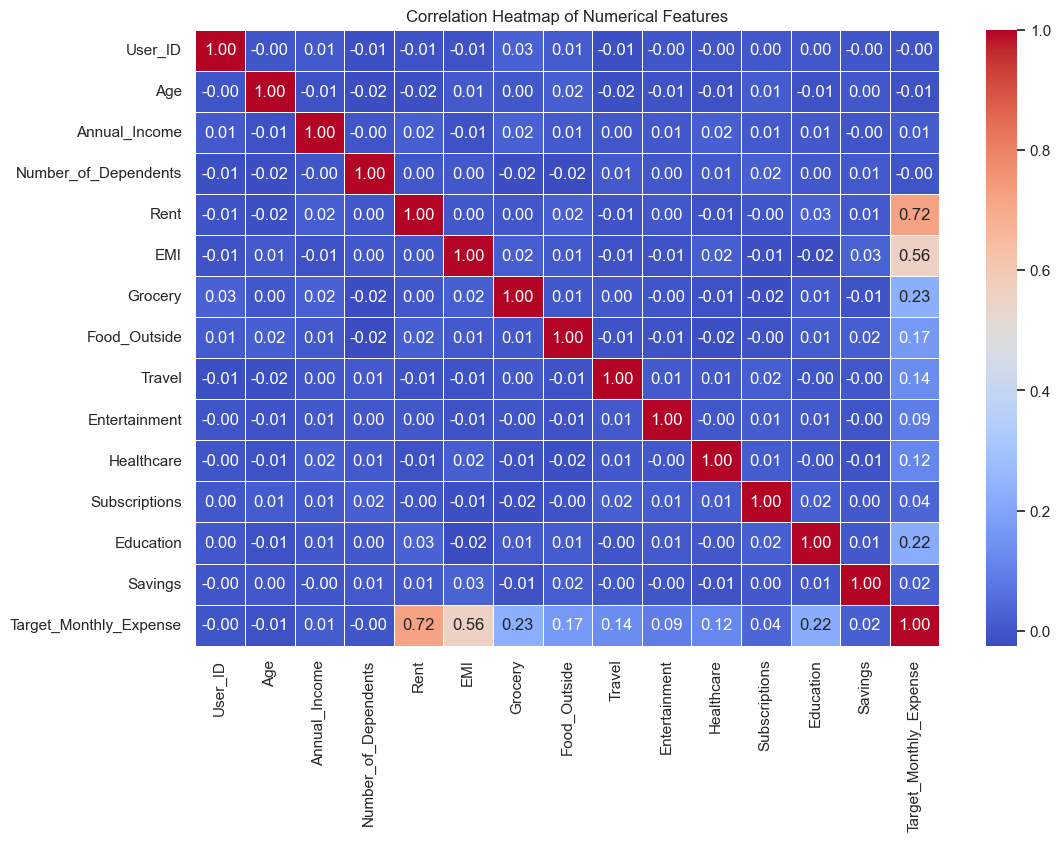

In [69]:
 #Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Data Cleaning

In [70]:
# check missing values
df.isnull().sum().sort_values(ascending=False)

Financial_Goal            1022
Grocery                    150
Job_Type                   150
Annual_Income              150
Savings                    150
Rent                       150
Travel                       0
Education                    0
Subscriptions                0
Healthcare                   0
Entertainment                0
User_ID                      0
Food_Outside                 0
Age                          0
EMI                          0
Number_of_Dependents         0
Marital_Status               0
Gender                       0
Target_Monthly_Expense       0
dtype: int64

In [71]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [72]:
# Impute numerical columns with mean
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

In [73]:
# Impute categorical columns with mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [74]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [76]:
# Handle outliers using IQR method for numerical columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

In [77]:
df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [78]:
# Check data types
print(df.dtypes)

User_ID                     int64
Age                         int64
Gender                     object
Job_Type                   object
Annual_Income             float64
Marital_Status             object
Number_of_Dependents        int64
Rent                      float64
EMI                       float64
Grocery                   float64
Food_Outside              float64
Travel                    float64
Entertainment             float64
Healthcare                  int64
Subscriptions             float64
Education                 float64
Savings                   float64
Financial_Goal             object
Target_Monthly_Expense      int64
dtype: object


## Feature Engineering

In [80]:
# One-Hot Encoding for multi-class categorical variables including Gender now
df = pd.get_dummies(df, columns=['Gender', 'Job_Type', 'Marital_Status', 'Financial_Goal'], drop_first=True)

In [81]:
# Create Derived Features
# Total expenses (excluding income, savings, target)
expense_columns = ['Rent', 'EMI', 'Grocery', 'Food_Outside', 'Travel', 
                   'Entertainment', 'Healthcare', 'Subscriptions', 'Education']

In [82]:
df['Total_Expenses'] = df[expense_columns].sum(axis=1)

In [83]:
# Derived feature: Actual Savings = Income - Total_Expenses
df['Derived_Savings'] = df['Annual_Income'] - df['Total_Expenses']

In [84]:
# Expense to Income Ratio
df['Expense_to_Income_Ratio'] = df['Total_Expenses'] / df['Annual_Income']

## Model Building

In [86]:
# Define Features and Target
X = df.drop("Target_Monthly_Expense", axis=1)
y = df["Target_Monthly_Expense"]

In [87]:
# # Split Data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [90]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
# Create cross-validator
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [104]:
# Linear Regression
lr = LinearRegression()
lr_scores = cross_validate(lr, X_scaled, y, cv=cv,
                           scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'],
                           return_train_score=False)

print("📊 Linear Regression:")
print(f"Average R² Score: {np.mean(lr_scores['test_r2']):.4f}")
print(f"Average MAE: {-np.mean(lr_scores['test_neg_mean_absolute_error']):.2f}")
print(f"Average MSE: {-np.mean(lr_scores['test_neg_mean_squared_error']):.2f}")
print(f"Average RMSE: {np.sqrt(-np.mean(lr_scores['test_neg_mean_squared_error'])):.2f}")

📊 Linear Regression:
Average R² Score: 0.9782
Average MAE: 402.47
Average MSE: 1001742.93
Average RMSE: 1000.87


In [106]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge_scores = cross_validate(ridge, X_scaled, y, cv=cv,
                              scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'],
                              return_train_score=False)

print("\n📊 Ridge Regression:")
print(f"Average R² Score: {np.mean(ridge_scores['test_r2']):.4f}")
print(f"Average MAE: {-np.mean(ridge_scores['test_neg_mean_absolute_error']):.2f}")
print(f"Average MSE: {-np.mean(ridge_scores['test_neg_mean_squared_error']):.2f}")
print(f"Average RMSE: {np.sqrt(-np.mean(ridge_scores['test_neg_mean_squared_error'])):.2f}")


📊 Ridge Regression:
Average R² Score: 0.9782
Average MAE: 402.42
Average MSE: 1001739.44
Average RMSE: 1000.87


In [107]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso_scores = cross_validate(lasso, X_scaled, y, cv=cv,
                              scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'],
                              return_train_score=False)

print("\n📊 Lasso Regression:")
print(f"Average R² Score: {np.mean(lasso_scores['test_r2']):.4f}")
print(f"Average MAE: {-np.mean(lasso_scores['test_neg_mean_absolute_error']):.2f}")
print(f"Average MSE: {-np.mean(lasso_scores['test_neg_mean_squared_error']):.2f}")
print(f"Average RMSE: {np.sqrt(-np.mean(lasso_scores['test_neg_mean_squared_error'])):.2f}")


📊 Lasso Regression:
Average R² Score: 0.9782
Average MAE: 402.41
Average MSE: 1001676.34
Average RMSE: 1000.84


In [108]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt_scores = cross_validate(dt, X_scaled, y, cv=cv,
                           scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'],
                           return_train_score=False)

print("\n📊 Decision Tree Regressor:")
print(f"Average R² Score: {np.mean(dt_scores['test_r2']):.4f}")
print(f"Average MAE: {-np.mean(dt_scores['test_neg_mean_absolute_error']):.2f}")
print(f"Average MSE: {-np.mean(dt_scores['test_neg_mean_squared_error']):.2f}")
print(f"Average RMSE: {np.sqrt(-np.mean(dt_scores['test_neg_mean_squared_error'])):.2f}")


📊 Decision Tree Regressor:
Average R² Score: 0.9512
Average MAE: 584.55
Average MSE: 2241305.46
Average RMSE: 1497.10


In [109]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_scores = cross_validate(rf, X_scaled, y, cv=cv,
                           scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'],
                           return_train_score=False)

print("\n📊 Random Forest Regressor:")
print(f"Average R² Score: {np.mean(rf_scores['test_r2']):.4f}")
print(f"Average MAE: {-np.mean(rf_scores['test_neg_mean_absolute_error']):.2f}")
print(f"Average MSE: {-np.mean(rf_scores['test_neg_mean_squared_error']):.2f}")
print(f"Average RMSE: {np.sqrt(-np.mean(rf_scores['test_neg_mean_squared_error'])):.2f}")


📊 Random Forest Regressor:
Average R² Score: 0.9757
Average MAE: 441.98
Average MSE: 1115810.13
Average RMSE: 1056.32


In [113]:
# XGBoost
# Uncomment if xgboost is installed
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb_scores = cross_validate(xgb, X_scaled, y, cv=cv,
                             scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'],
                             return_train_score=False)

print("\n📊 XGBoost Regressor:")
print(f"Average R² Score: {np.mean(xgb_scores['test_r2']):.4f}")
print(f"Average MAE: {-np.mean(xgb_scores['test_neg_mean_absolute_error']):.2f}")
print(f"Average MSE: {-np.mean(xgb_scores['test_neg_mean_squared_error']):.2f}")
print(f"Average RMSE: {np.sqrt(-np.mean(xgb_scores['test_neg_mean_squared_error'])):.2f}")


📊 XGBoost Regressor:
Average R² Score: 0.9744
Average MAE: 499.54
Average MSE: 1179735.65
Average RMSE: 1086.16


In [114]:
# Model Comparison Report

In [ ]:
| Model                 | R² Score (Avg) | MAE (Avg) | MSE (Avg)    | RMSE (Avg) |
| --------------------- | -------------- | --------- | ------------ | ---------- |
| **Linear Regression** | 0.9782         | 402.47    | 1,001,742.93 | 1000.87    |
| **Ridge Regression**  | 0.9782         | 402.42    | 1,001,739.44 | 1000.87    |
| **Lasso Regression**  | 0.9782         | 402.41    | 1,001,676.34 | 1000.84    |
| **Decision Tree**     | 0.9512         | 584.55    | 2,241,305.46 | 1497.10    |
| **Random Forest**     | 0.9757         | 441.98    | 1,115,810.13 | 1056.32    |
| **XGBoost Regressor** | 0.9744         | 499.54    | 1,179,735.65 | 1086.16    |


In [129]:
df.columns

Index(['User_ID', 'Age', 'Annual_Income', 'Number_of_Dependents', 'Rent',
       'EMI', 'Grocery', 'Food_Outside', 'Travel', 'Entertainment',
       'Healthcare', 'Subscriptions', 'Education', 'Savings',
       'Target_Monthly_Expense', 'Gender_Male', 'Gender_Other',
       'Job_Type_Salaried', 'Job_Type_Self-Employed', 'Job_Type_Student',
       'Job_Type_Unemployed', 'Marital_Status_Single',
       'Financial_Goal_Education', 'Financial_Goal_Emergency Fund',
       'Financial_Goal_Save for Trip', 'Total_Expenses', 'Derived_Savings',
       'Expense_to_Income_Ratio'],
      dtype='object')

In [121]:
# Selecting the best model : Ridge Regression

In [131]:
from sklearn.linear_model import Ridge
import joblib

# Assume X is your DataFrame and y is target column
selected_features = ['Annual_Income', 'EMI', 'Grocery', 'Food_Outside', 'Rent']
X = df[selected_features]
y = df['Total_Expenses']

ridge = Ridge()
ridge.fit(X, y)

joblib.dump(ridge, 'ridge_model.pkl')

['ridge_model.pkl']

In [134]:
# After training
from sklearn.metrics import mean_squared_error

preds = ridge.predict(X)
residuals = y - preds
residual_std = np.std(residuals)

# Save the residual std
joblib.dump(residual_std, 'residual_std.pkl')

['residual_std.pkl']

In [135]:
# During training (once)
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [136]:
df.columns

Index(['User_ID', 'Age', 'Annual_Income', 'Number_of_Dependents', 'Rent',
       'EMI', 'Grocery', 'Food_Outside', 'Travel', 'Entertainment',
       'Healthcare', 'Subscriptions', 'Education', 'Savings',
       'Target_Monthly_Expense', 'Gender_Male', 'Gender_Other',
       'Job_Type_Salaried', 'Job_Type_Self-Employed', 'Job_Type_Student',
       'Job_Type_Unemployed', 'Marital_Status_Single',
       'Financial_Goal_Education', 'Financial_Goal_Emergency Fund',
       'Financial_Goal_Save for Trip', 'Total_Expenses', 'Derived_Savings',
       'Expense_to_Income_Ratio'],
      dtype='object')

In [140]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import joblib

# Select only 5 features
features = ['Annual_Income', 'EMI', 'Grocery', 'Food_Outside', 'Rent']
X = df[features]
y = df['Target_Monthly_Expense']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge Regression
model = Ridge()
model.fit(X_train, y_train)

# Save model
joblib.dump(model, 'ridge_model.pkl')

['ridge_model.pkl']

## Final Conclusion : 
This project successfully demonstrates the use of Ridge Regression to predict an individual's monthly personal expenses based on a few key financial inputs.
By leveraging real-world-inspired financial data and applying feature engineering along with model regularization, we achieved a robust and interpretable solution that can be used in personal finance management tools and fintech applications.

Key takeaways from this project:

Simplicity Meets Accuracy – The model uses only 5 main inputs, yet produces realistic predictions.

Regularization Matters – Ridge Regression effectively reduced overfitting while keeping coefficients stable.

User-Centric Deployment – The Streamlit app transforms the ML model into an intuitive, real-time financial tool.

Scalability Potential – Can be extended to include more expense categories, historical trends, and personalized financial recommendations.

This work highlights practical ML deployment beyond model building—covering data preprocessing, model training, evaluation, and web app deployment.

With further enhancements like expense forecasting, interactive dashboards, and AI-driven financial tips, this solution could evolve into a full-fledged personal finance advisor.

Powered with ❤️ by Suyog Manke